# Toronto Analysis

## Import Necessary Packages

In [1]:
# Import relevant packages
import numpy as np # library to handle data in a vectorized manner
print(np.__path__)

import pandas as pd # library for data analsysis
pd.set_option('display.max_rows', None)

import scipy

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Packages successfully installed')

['C:\\Users\\ryan.mickey\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\numpy']
Packages successfully installed


In [2]:
# Install packages that are new
# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('folium and geopy are installed.')

folium and geopy are installed.


In [3]:
# Install beautifulsoup4 for web-scraping
import sys
#!conda install --yes --prefix {sys.prefix} beautifulsoup4
from bs4 import BeautifulSoup

print('Beautifulsoup installed')

Beautifulsoup installed


# Wrangle, clean, and pre-process data 

We are going to use BeautifulSoup to wrangle the data for postal code, borough, and neighborhood for Toronto using the  Wikipedia articl [List of postal codes of Canada: M](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M). Once we have the data we will perform the following:
- The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood

## Parse the table from the Wikipedia Table

The code below uses [BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/#) to parse the list of Postcodes in Toronto, Canada. It grabs the table data from the HTML and then cleans the text up to creat a list. Finally, the list is split into a list of lists that contains the informaiton required including the header row. Finally, the code prints the list of lists. 

In [4]:
# Assign data
data_url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

# Instantiate request for url text
source = requests.get(data_url).text

# Use BeautifulSoup to pull HTML from site
soup = BeautifulSoup(source, 'lxml')

# Use prettify method to show indentions in HTML
#print(soup.prettify())

# Grab the table data
my_table = soup.find('table', class_='sortable')
data = my_table.find(['tbody', 'tr', 'td']).text

# Remove '\n' from data
data = data.split('\n')
# Remove '' 
data = list(filter(None, data))
# Remove header
header = data[0:3]
print(header)
# Remove header from the data
data = data[3:]

# Method to split up your lists into chunks borrowed from https://www.datacamp.com/community/tutorials/18-most-common-python-list-questions-learn-python#question11
def chunks(list, chunkSize):
    """Yield successive chunkSize-sized chunks from list."""
    for i in range(0, len(list), chunkSize):
        yield list[i:i + chunkSize]
        
toronto_fsa_list = list(chunks(data, 3))
print(toronto_fsa_list)

['Postcode', 'Borough', 'Neighbourhood']
[['M1A', 'Not assigned', 'Not assigned'], ['M2A', 'Not assigned', 'Not assigned'], ['M3A', 'North York', 'Parkwoods'], ['M4A', 'North York', 'Victoria Village'], ['M5A', 'Downtown Toronto', 'Harbourfront'], ['M5A', 'Downtown Toronto', 'Regent Park'], ['M6A', 'North York', 'Lawrence Heights'], ['M6A', 'North York', 'Lawrence Manor'], ['M7A', "Queen's Park", 'Not assigned'], ['M8A', 'Not assigned', 'Not assigned'], ['M9A', 'Etobicoke', 'Islington Avenue'], ['M1B', 'Scarborough', 'Rouge'], ['M1B', 'Scarborough', 'Malvern'], ['M2B', 'Not assigned', 'Not assigned'], ['M3B', 'North York', 'Don Mills North'], ['M4B', 'East York', 'Woodbine Gardens'], ['M4B', 'East York', 'Parkview Hill'], ['M5B', 'Downtown Toronto', 'Ryerson'], ['M5B', 'Downtown Toronto', 'Garden District'], ['M6B', 'North York', 'Glencairn'], ['M7B', 'Not assigned', 'Not assigned'], ['M8B', 'Not assigned', 'Not assigned'], ['M9B', 'Etobicoke', 'Cloverdale'], ['M9B', 'Etobicoke', 'Isli

## Convert to DataFrame and Clean the Table

The following code cleans up the data by the following:
- Creates a dataframe using pandas.
- Removing cells with a borough that is Not assigned.
- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
- If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
- In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [5]:
# Concert list to a dataframe: 'Postcode', 'Borough', 'Neighbourhood'
df = pd.DataFrame(toronto_fsa_list, columns = header)

# Delete rows where the Bourough is "Not assigned"
df = df[df.Borough != 'Not assigned']

# Combine duplicate Postcodes by combining neighborhoods
df = df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(', '.join).reset_index()

# If a cell has a Borough but "Not assigned" for neighborhood apply the Boroug to the neighborhood (e.g. M7A	Queen's Park	)
df.loc[df['Neighbourhood'] == 'Not assigned', 'Neighbourhood'] = df['Borough']
print('The shape of the datafram is', df.shape)
df

The shape of the datafram is (103, 3)


,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


The dataframe from the table has 103 postcodes with three rows.

## Add the latitude and longitude for postal codes

 will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html. 
 
 The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking postal code M5G as an example, your code would look something like t

## Add the latitude and longitude for postal codes

The code below attempted to use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html. 
 
The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. The first segment of code below first intalls the geocoder package.

The second loops through each row of the dataframe and pulls out the postal_code. It then executes the geocoder methods to extract the geographic coordinates running until it is successful. Finally, the code appends the geographic code into a list call location.

This code below is commented out because it would not run successfully.  As an alternative, I import the geographic coordinates from [this csv file](https://cocl.us/Geospatial_data). The geocodes are then appended to the dataframe.

In [6]:
# !conda install -c conda-forge geocoder

# # print('geocoder installed')

In [7]:
# # Insall geocoder
# # pip install geocoder

# import geocoder

# lat_lng_coords = None
# location = []
# # Loop until you get the coordinates
# for index, row in  df.iterrows():
#     postal_code = row['Postcode']
#     lat_lng_coords = None

#     while(lat_lng_coords is None):
#         g = geocoder.google('{}, Toronta, Ontario'.format(postal_code))
#         lat_lng_coords = g.latlng
#         print(lat_lng_coords)
#     location.append([row['Postcode'], lat_lng_coords[0], lat_lng_coords[1]])


In [8]:
# Import Latitude and Longitude from the CSV file provided 

from csv import reader
open_file = open('Geospatial_Coordinates.csv')
read = reader(open_file)
geocodes = list(read)
geo_header = geocodes[0]
df_geo = pd.DataFrame(geocodes[1:], columns = geo_header)
df_geo = df_geo.rename(index=str, columns={'Postal Code': 'Postcode'})
# df_geo.head()

# Merge latitude and longitude
df = df.merge(df_geo, on = 'Postcode')

# Convert Latitude and Longitude to flot
df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.8066863,-79.1943534
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.7845351,-79.1604971
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.7635726,-79.1887115
3,M1G,Scarborough,Woburn,43.7709921,-79.2169174
4,M1H,Scarborough,Cedarbrae,43.773136,-79.2394761


# Explore the data further

In [9]:
print('The dataframe has {} postcodes and {} Boroughs.'.format(
        len(df['Postcode'].unique()),
        len(df['Borough'].unique()),
    )
)
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
df.dtypes


The dataframe has 103 postcodes and 11 Boroughs.


Postcode          object
Borough           object
Neighbourhood     object
Latitude         float64
Longitude        float64
dtype: object

## Create a map of Toronto with neighborhoods superimposed

In [10]:
# create map of Toronto using latitude and longitude values
latitude = 43.6532
longitude = -79.3832
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11, control_scale = True)

# map_toronto

In [11]:
# add markers to map
for lat, lng, postcode, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Postcode'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}, {}'.format(postcode, borough, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Restrict postcodes to those in Broughs containing "Toronto"

Below, I limit the analysis to Boroughs that contain "Toronto."

At first, I tried to do this using dataframes, but the append function did not work properly. Therefore, I converted the dataframe to lists to append and then re-converted the lists back to dataframes


In [12]:
# # There is an error somewhere in the logic below because the dataframes come back empty.

# # Create empty dataframes to store postcodes by whether the Borough contains Toronto or not
# df_tor = pd.DataFrame([], columns= ['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude'])
# df_no_tor = pd.DataFrame([], columns= ['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude'])

# # Loop through the dataframe to assign bourghoughs by "Toronto" into one dataframe and boroughs without "Toronto" in another
# for index, row in df.iterrows():
#     borough = row['Borough']
#     print(row)
# #     print(borough[0])
#     if 'Toronto' in borough[0]:
#         print('Toronto')
#         df_tor = df_tor.append(pd.DataFrame(row, columns= ['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude'], index=[0]))
#     else:
#         df_no_tor = df_no_tor.append(row, ignore_index=True)
#         print('No Toronto')


# df_tor.head(5)
# # df_no_tor.head()

In [13]:
# Create empty lists to store postcodes by whether the Borough contains Toronto or not
l_tor = []
l_no_tor = []

# # Loop through the dataframe to assign bourghoughs by "Toronto" into one dataframe and boroughs without "Toronto" in another
for index, row in df.iterrows():
    row = row.tolist() # convert dataframe to a list
    borough = row[1]
    if 'Toronto' in borough:
        l_tor.append(row)
    else:
        l_no_tor.append(row)

# Converst lists back to dataframes
df_tor = pd.DataFrame(l_tor, columns= ['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude'])
df_no_tor = pd.DataFrame(l_no_tor, columns= ['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude'])
print(df_tor.dtypes)
df_tor.head()

Postcode          object
Borough           object
Neighbourhood     object
Latitude         float64
Longitude        float64
dtype: object


,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


### Re-create the map of Toronto using just the Borough's containing "Toronto"

In [14]:
# create map of Toronto using latitude and longitude values
latitude = 43.6532
longitude = -79.3832
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12, control_scale = True)

# add markers to map
for lat, lng, postcode, borough, neighborhood in zip(df_tor['Latitude'], df_tor['Longitude'], df_tor['Postcode'], df_tor['Borough'], df_tor['Neighbourhood']):
    label = '{}, {}, {}'.format(postcode, borough, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Import data from Four Square

### Define Foursquare Credentials and Version

Below we define the information required to access my Foursquare client

In [37]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
#VERSION = '20180605' # Foursquare API version
VERSION = '20190101'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


Limit the radius from the geographic center of a postal code to 500 meters.  We are limiting it to this because many of the postal codes are close together.  For a more sophisticated analysis, we would adjust the radius by measuring the distance to another postal code.

The analysis will also limit the number of venues to 100 to conserve pulls from the Foursquare API.  Than can be relaxed to expand the analysis.

In [18]:
# Define Parameters

def getNearbyVenues(names, latitudes, longitudes, LIMIT=200, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
# Define parameters
LIMIT = 200 # limit of number of venues returned by Foursquare API

tor_venues = getNearbyVenues(names=df_tor['Postcode'], latitudes=df_tor['Latitude'], longitudes=df_tor['Longitude'], LIMIT=200,  radius=1000)

# Export CSV
tor_venues.to_csv(r'tor_venues.csv')

M4E
M4K
M4L
M4M
M4N
M4P
M4R
M4S
M4T
M4V
M4W
M4X
M4Y
M5A
M5B
M5C
M5E
M5G
M5H
M5J
M5K
M5L
M5N
M5P
M5R
M5S
M5T
M5V
M5W
M5X
M6G
M6H
M6J
M6K
M6P
M6R
M6S
M7Y


In [ ]:
# from csv import reader
# import chardet    
# rawdata = open('tor_venues.csv')
# result = chardet.detect(rawdata)
# charenc = result['encoding']

# # opened_file = open('tor_venues.csv', encoding='utf-8')
# # read_file = reader(opened_file)
# # list_file = list(read_file)
# # l_file = list(read_file)
# # tor_venues = pd.DataFrame(l_file, columns = ['Postcode', 'Postcode Latitude', 'Postcode Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'])

In [20]:
print(tor_venues.shape)
tor_venues

(3091, 7)


,Postcode,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M4E,43.676357,-79.293031,Tori's Bakeshop,43.672114,-79.290331,Vegetarian / Vegan Restaurant
1,M4E,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
2,M4E,43.676357,-79.293031,The Fox Theatre,43.672801,-79.287272,Indie Movie Theater
3,M4E,43.676357,-79.293031,The Beech Tree,43.680493,-79.288846,Gastropub
4,M4E,43.676357,-79.293031,Ed's Real Scoop,43.672630,-79.287993,Ice Cream Shop
5,M4E,43.676357,-79.293031,Beaches Bake Shop,43.680363,-79.289692,Bakery
6,M4E,43.676357,-79.293031,Bagels On Fire,43.672864,-79.286784,Bagel Shop
7,M4E,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
8,M4E,43.676357,-79.293031,Mastermind Toys,43.671453,-79.293971,Toy / Game Store
9,M4E,43.676357,-79.293031,The Remarkable Bean,43.672801,-79.287038,Coffee Shop


Check number of venues per postal code.

In [21]:
tor_venues.groupby('Postcode').count()

,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postcode,,,,,,
M4E,79,79,79,79,79,79
M4K,100,100,100,100,100,100
M4L,76,76,76,76,76,76
M4M,100,100,100,100,100,100
M4N,9,9,9,9,9,9
M4P,100,100,100,100,100,100
M4R,46,46,46,46,46,46
M4S,100,100,100,100,100,100
M4T,63,63,63,63,63,63


Let's find out how many unique categories can be curated from all the returned venues,

In [22]:
print('There are {} uniques categories.'.format(len(tor_venues['Venue Category'].unique())))

There are 277 uniques categories.


# Analyze Neighborhoods by Venues

## Count the number of venues by category

The code below uses creates dummy for whether the neighborhood has a venue of the category.

In [23]:
# one hot encoding
tor_onehot = pd.get_dummies(tor_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tor_onehot['Postcode'] = tor_venues['Postcode'] 

# move neighborhood column to the first column
fixed_columns = [tor_onehot.columns[-1]] + list(tor_onehot.columns[:-1])
tor_onehot = tor_onehot[fixed_columns]

print(tor_onehot.shape)
tor_onehot.head(10)

(3091, 278)


,Postcode,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,M4E,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Calculate the mean number of venues by type for each postcode.

In [24]:
tor_grouped = tor_onehot.groupby('Postcode').mean().reset_index()
print('The mean number of venues for each postal code is {}.'.format(tor_grouped.shape))
tor_grouped

The mean number of venues for each postal code is (38, 278).


,Postcode,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,M4E,0.00,0.00,0.0000,0.0000,0.000000,0.000000,0.00,0.00,0.00,...,0.012658,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000
1,M4K,0.00,0.00,0.0000,0.0000,0.010000,0.000000,0.00,0.00,0.00,...,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.020000,0.000000
2,M4L,0.00,0.00,0.0000,0.0000,0.000000,0.000000,0.00,0.00,0.00,...,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.013158,0.013158,0.000000
3,M4M,0.00,0.00,0.0000,0.0000,0.050000,0.000000,0.00,0.01,0.00,...,0.010000,0.00,0.00,0.050000,0.00,0.000000,0.00,0.000000,0.010000,0.000000
4,M4N,0.00,0.00,0.0000,0.0000,0.000000,0.000000,0.00,0.00,0.00,...,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000
5,M4P,0.00,0.00,0.0000,0.0000,0.000000,0.000000,0.00,0.00,0.00,...,0.010000,0.00,0.00,0.010000,0.00,0.010000,0.00,0.000000,0.020000,0.000000
6,M4R,0.00,0.00,0.0000,0.0000,0.000000,0.000000,0.00,0.00,0.00,...,0.000000,0.00,0.00,0.021739,0.00,0.021739,0.00,0.000000,0.021739,0.000000
7,M4S,0.00,0.00,0.0000,0.0000,0.000000,0.000000,0.00,0.00,0.00,...,0.010000,0.00,0.00,0.010000,0.00,0.010000,0.01,0.000000,0.010000,0.000000
8,M4T,0.00,0.00,0.0000,0.0000,0.015873,0.000000,0.00,0.00,0.00,...,0.000000,0.00,0.00,0.015873,0.00,0.000000,0.00,0.000000,0.015873,0.000000
9,M4V,0.00,0.00,0.0000,0.0000,0.012346,0.000000,0.00,0.00,0.00,...,0.012346,0.00,0.00,0.012346,0.00,0.012346,0.00,0.000000,0.012346,0.000000


## Print each neighborhood along with top 5 most common venues

In [25]:
num_top_venues = 5

for code in tor_grouped['Postcode']:
    print("----"+code+"----")
    temp = tor_grouped[tor_grouped['Postcode'] == code].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M4E----
                 venue  freq
0          Coffee Shop  0.06
1                  Pub  0.06
2          Pizza Place  0.06
3                  Bar  0.04
4  Japanese Restaurant  0.04


----M4K----
                  venue  freq
0      Greek Restaurant  0.13
1           Coffee Shop  0.08
2                   Pub  0.05
3                  Café  0.05
4  Fast Food Restaurant  0.04


----M4L----
               venue  freq
0  Indian Restaurant  0.08
1        Coffee Shop  0.05
2               Park  0.04
3               Café  0.04
4              Beach  0.04


----M4M----
                   venue  freq
0            Coffee Shop  0.07
1                    Bar  0.06
2    American Restaurant  0.05
3                   Café  0.05
4  Vietnamese Restaurant  0.05


----M4N----
         venue  freq
0  College Gym  0.11
1     Bus Line  0.11
2        Trail  0.11
3    Bookstore  0.11
4         Café  0.11


----M4P----
                  venue  freq
0           Coffee Shop  0.12
1  Fast Food Restaurant  0.06


# Move top venues into a *pandas* dataframe

The following is a function to sort the venues in descending order.

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

The below wil create a new dataframe to display the top 10 venues for each postalcode.

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postcode_venues_sorted = pd.DataFrame(columns=columns)
postcode_venues_sorted['Postcode'] = tor_grouped['Postcode']

for ind in np.arange(tor_grouped.shape[0]):
    postcode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tor_grouped.iloc[ind, :], num_top_venues)

postcode_venues_sorted

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,Coffee Shop,Pizza Place,Pub,Japanese Restaurant,Breakfast Spot,Beach,Bar,Sandwich Place,Bakery,Tea Room
1,M4K,Greek Restaurant,Coffee Shop,Café,Pub,Fast Food Restaurant,Italian Restaurant,Pizza Place,Discount Store,Sandwich Place,Ramen Restaurant
2,M4L,Indian Restaurant,Coffee Shop,Park,Café,Beach,Sandwich Place,Butcher,Fast Food Restaurant,Burrito Place,Brewery
3,M4M,Coffee Shop,Bar,Café,Bakery,American Restaurant,Vietnamese Restaurant,Diner,Brewery,Italian Restaurant,Latin American Restaurant
4,M4N,Bus Line,Bookstore,College Quad,College Gym,Coffee Shop,Gym / Fitness Center,Park,Café,Trail,Electronics Store
5,M4P,Coffee Shop,Fast Food Restaurant,Italian Restaurant,Café,Pizza Place,Dessert Shop,Gym,Sushi Restaurant,Pharmacy,Diner
6,M4R,Sporting Goods Shop,Skating Rink,Italian Restaurant,Coffee Shop,Café,Mexican Restaurant,Diner,Pharmacy,Spa,Burger Joint
7,M4S,Coffee Shop,Italian Restaurant,Sushi Restaurant,Café,Dessert Shop,Restaurant,Pub,Pizza Place,Fast Food Restaurant,Gym
8,M4T,Italian Restaurant,Coffee Shop,Park,Pub,Grocery Store,Gym,Bagel Shop,Pharmacy,Pizza Place,Playground
9,M4V,Coffee Shop,Park,Sushi Restaurant,Italian Restaurant,Pub,Thai Restaurant,Pizza Place,Gym / Fitness Center,Bagel Shop,Grocery Store


# Cluster the Postal Codes

The following will use k-means to cluster the postal codes into clusters.

The function defined below was taken from the [gap-stat](https://github.com/milesgranger/gap_statistic) package from Miles Granger using [this example notebook](https://anaconda.org/milesgranger/gap-statistic/notebook). I tried to install the package with conda, but there was an error.

In [28]:
# Create dataframe for clustering
tor_grouped_clustering = tor_grouped.drop('Postcode', 1)
tor_grouped_clustering.head()

,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,...,0.012658,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.00,0.0,0.0,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.020000,0.0
2,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.013158,0.013158,0.0
3,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.01,0.0,0.0,...,0.010000,0.0,0.0,0.05,0.0,0.0,0.0,0.000000,0.010000,0.0
4,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0


In [29]:
# Set parameters to find k
max_k = 10

In [30]:
# !conda install -c milesgranger gap-stat
# from gap_statistic import OptimalK


def optimalK(data, nrefs=3, maxClusters=max_k):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal


In [31]:
k, gapdf = optimalK(tor_grouped_clustering, nrefs=5, maxClusters=max_k)
print('Optimal k is: ', k)

Optimal k is:  9


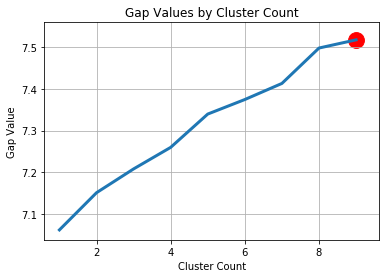

In [32]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

The optimal number of clusters is 9 based Gap statistic analysis above. This is suspect because it looks like the gap statistic increases indefinitely by increaing k.  For this analysis, I will assume that k is correct, but this should require additional scrutify. One such method coudl be using [silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [33]:
# set number of clusters
kclusters = 9

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([6, 1, 2, 6, 3, 1, 1, 1, 2, 2])

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [34]:
# add clustering labels
#print(postcode_venues_sorted)
postcode_venues_sorted_cluster = postcode_venues_sorted
postcode_venues_sorted_cluster.insert(0, 'Cluster Labels', kmeans.labels_)

tor_merged = df_tor

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
tor_merged = tor_merged.join(postcode_venues_sorted_cluster.set_index('Postcode'), on='Postcode')

tor_merged.head() 

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,6,Coffee Shop,Pizza Place,Pub,Japanese Restaurant,Breakfast Spot,Beach,Bar,Sandwich Place,Bakery,Tea Room
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,1,Greek Restaurant,Coffee Shop,Café,Pub,Fast Food Restaurant,Italian Restaurant,Pizza Place,Discount Store,Sandwich Place,Ramen Restaurant
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,2,Indian Restaurant,Coffee Shop,Park,Café,Beach,Sandwich Place,Butcher,Fast Food Restaurant,Burrito Place,Brewery
3,M4M,East Toronto,Studio District,43.659526,-79.340923,6,Coffee Shop,Bar,Café,Bakery,American Restaurant,Vietnamese Restaurant,Diner,Brewery,Italian Restaurant,Latin American Restaurant
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,3,Bus Line,Bookstore,College Quad,College Gym,Coffee Shop,Gym / Fitness Center,Park,Café,Trail,Electronics Store


## Visualize the reusults

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, control_scale = True)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tor_merged['Latitude'], tor_merged['Longitude'], tor_merged['Postcode'], tor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine the Clusters

Based on the map above, it appears that many of the clusters are based on geographic location. Part of the reason is that many of the dense postal codes are well within the 1,000 radius of each other which causes the same venues to be picked up. Let's explore the clusters by examining the most common type of venue for each neighborhood.

In [36]:
from IPython.display import display

for clust in range(kclusters):
    print('Cluster:', clust)
    display(tor_merged.loc[tor_merged['Cluster Labels'] == clust, tor_merged.columns[[1] + list(range(5, tor_merged.shape[1]))]])

Cluster: 0


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Hotel,Bakery,Italian Restaurant,Breakfast Spot,Cosmetics Shop,Gastropub,Seafood Restaurant
16,Downtown Toronto,0,Coffee Shop,Hotel,Café,Beer Bar,Japanese Restaurant,Restaurant,Park,Bakery,Cocktail Bar,Breakfast Spot
18,Downtown Toronto,0,Coffee Shop,Hotel,Café,Theater,Steakhouse,Sushi Restaurant,Movie Theater,Japanese Restaurant,Beer Bar,Restaurant
19,Downtown Toronto,0,Coffee Shop,Hotel,Café,Italian Restaurant,Aquarium,Brewery,Scenic Lookout,Bar,Park,Bakery
20,Downtown Toronto,0,Coffee Shop,Hotel,Café,Italian Restaurant,Steakhouse,American Restaurant,Concert Hall,Gastropub,Pizza Place,Beer Bar
21,Downtown Toronto,0,Coffee Shop,Hotel,Café,Restaurant,Gastropub,American Restaurant,Steakhouse,Beer Bar,Concert Hall,Japanese Restaurant
28,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Japanese Restaurant,Beer Bar,Hotel,Breakfast Spot,Seafood Restaurant,Gastropub,Creperie
29,Downtown Toronto,0,Coffee Shop,Hotel,Café,Steakhouse,Theater,Japanese Restaurant,Italian Restaurant,Gastropub,Beer Bar,Plaza


Cluster: 1


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,East Toronto,1,Greek Restaurant,Coffee Shop,Café,Pub,Fast Food Restaurant,Italian Restaurant,Pizza Place,Discount Store,Sandwich Place,Ramen Restaurant
5,Central Toronto,1,Coffee Shop,Fast Food Restaurant,Italian Restaurant,Café,Pizza Place,Dessert Shop,Gym,Sushi Restaurant,Pharmacy,Diner
6,Central Toronto,1,Sporting Goods Shop,Skating Rink,Italian Restaurant,Coffee Shop,Café,Mexican Restaurant,Diner,Pharmacy,Spa,Burger Joint
7,Central Toronto,1,Coffee Shop,Italian Restaurant,Sushi Restaurant,Café,Dessert Shop,Restaurant,Pub,Pizza Place,Fast Food Restaurant,Gym
13,Downtown Toronto,1,Coffee Shop,Café,Theater,Italian Restaurant,Diner,Gym / Fitness Center,Breakfast Spot,Restaurant,Bakery,Park
36,West Toronto,1,Coffee Shop,Café,Pizza Place,Bakery,Italian Restaurant,Falafel Restaurant,Gastropub,Sushi Restaurant,Pub,Park


Cluster: 2


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,East Toronto,2,Indian Restaurant,Coffee Shop,Park,Café,Beach,Sandwich Place,Butcher,Fast Food Restaurant,Burrito Place,Brewery
8,Central Toronto,2,Italian Restaurant,Coffee Shop,Park,Pub,Grocery Store,Gym,Bagel Shop,Pharmacy,Pizza Place,Playground
9,Central Toronto,2,Coffee Shop,Park,Sushi Restaurant,Italian Restaurant,Pub,Thai Restaurant,Pizza Place,Gym / Fitness Center,Bagel Shop,Grocery Store
11,Downtown Toronto,2,Park,Coffee Shop,Gastropub,Japanese Restaurant,Café,Diner,Thai Restaurant,Dance Studio,Restaurant,Deli / Bodega
12,Downtown Toronto,2,Coffee Shop,Japanese Restaurant,Gay Bar,Café,Restaurant,Sushi Restaurant,Gastropub,Mediterranean Restaurant,Bubble Tea Shop,Dance Studio
14,Downtown Toronto,2,Coffee Shop,Clothing Store,Café,Fast Food Restaurant,Tea Room,Restaurant,Middle Eastern Restaurant,Italian Restaurant,Cosmetics Shop,Gastropub
17,Downtown Toronto,2,Coffee Shop,Café,Ramen Restaurant,Japanese Restaurant,Bubble Tea Shop,Vegetarian / Vegan Restaurant,Italian Restaurant,Park,Burger Joint,Ice Cream Shop
24,Central Toronto,2,Coffee Shop,Vegetarian / Vegan Restaurant,Bakery,Italian Restaurant,Café,Restaurant,Museum,Pizza Place,Pub,Gym
30,Downtown Toronto,2,Korean Restaurant,Coffee Shop,Café,Grocery Store,Ice Cream Shop,Indian Restaurant,Cocktail Bar,Bar,Pizza Place,Diner
37,East Toronto,2,Park,Coffee Shop,Brewery,Italian Restaurant,Burrito Place,Sushi Restaurant,Pet Store,Pizza Place,Pub,Burger Joint


Cluster: 3


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Central Toronto,3,Bus Line,Bookstore,College Quad,College Gym,Coffee Shop,Gym / Fitness Center,Park,Café,Trail,Electronics Store


Cluster: 4


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Downtown Toronto,4,Café,Harbor / Marina,Coffee Shop,Dance Studio,Sculpture Garden,Garden,Scenic Lookout,Sushi Restaurant,Track,Park


Cluster: 5


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,5,Sushi Restaurant,Italian Restaurant,Pharmacy,Bank,Café,Coffee Shop,Asian Restaurant,Dry Cleaner,Gastropub,Bakery


Cluster: 6


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,6,Coffee Shop,Pizza Place,Pub,Japanese Restaurant,Breakfast Spot,Beach,Bar,Sandwich Place,Bakery,Tea Room
3,East Toronto,6,Coffee Shop,Bar,Café,Bakery,American Restaurant,Vietnamese Restaurant,Diner,Brewery,Italian Restaurant,Latin American Restaurant
25,Downtown Toronto,6,Café,Bakery,Vegetarian / Vegan Restaurant,Bar,Restaurant,Mexican Restaurant,Bookstore,Arts & Crafts Store,Pub,Thai Restaurant
26,Downtown Toronto,6,Café,Vegetarian / Vegan Restaurant,Bar,Bakery,Mexican Restaurant,Dessert Shop,Coffee Shop,Yoga Studio,Gaming Cafe,Tea Room
32,West Toronto,6,Bar,Café,Bakery,Coffee Shop,Restaurant,Cocktail Bar,Asian Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Gift Shop
33,West Toronto,6,Café,Coffee Shop,Furniture / Home Store,Bar,Restaurant,Tibetan Restaurant,Hotel,Bakery,Beer Bar,Soccer Stadium
34,West Toronto,6,Bar,Café,Coffee Shop,Park,Italian Restaurant,Convenience Store,Thai Restaurant,Sushi Restaurant,Pizza Place,Restaurant
35,West Toronto,6,Bar,Coffee Shop,Pizza Place,Sushi Restaurant,Breakfast Spot,Thai Restaurant,Eastern European Restaurant,Bakery,Café,Sandwich Place


Cluster: 7


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Central Toronto,7,Park,Coffee Shop,Café,Pharmacy,Burger Joint,Gym / Fitness Center,Trail,Bank,Sushi Restaurant,Italian Restaurant
31,West Toronto,7,Café,Coffee Shop,Park,Italian Restaurant,Sushi Restaurant,Bar,Brewery,Supermarket,Gourmet Shop,Convenience Store


Cluster: 8


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Downtown Toronto,8,Park,Coffee Shop,Grocery Store,Bank,Metro Station,Japanese Restaurant,Smoothie Shop,Building,Pie Shop,Breakfast Spot


Cluster 0 contains only postal codes taht are in the Borough of Downtown Toronto.  THe number one venue category is coffee shops for all postalcodes, and 6 of the 8 have the category of Hotel as the second most common.

Cluster 1 contains some of the outer postal codes where in the East, Central, and West Toronto Boroughs. These postal codes have cofee shops but also have a number of different types of restaurants.

Cluster 2 contains postal codes from East, Central, and Downtown Toronto that are outside the most central postal codes of cluster 0. These postal codes have a diverse number of venue categories of which no one stands out.

Cluster 3 is in Central Toronto, and its defining venue is the Bus Line followed by bookstores and finally the college.

Cluster 4 is the postal code with the harbor which is what makes it unique.

Cluster 5 is a central Toronto postal code with sushi and italian restaurants as the top venues.

Cluster 6 are also much like Cluster 1. It does seems to have more bars than other clusters.

Cluster 7 are two postal codes in central and west Toronto, respectively. They have parks, cafe's, and coffee shops in the top 3 most common venues.

Cluster 8 has one downtown postal code that contains parks, coffee shots, and grocery stores.

